# Semantic Deviation

### Import

In [3]:
import os
import pickle
import networkx as nx
import community as community_louvain
import numpy as np
from collections import Counter, defaultdict
from google.colab import drive

import json
import random
import pandas as pd
import csv

from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import cosine_distances

# graph files folder
drive.mount('/content/drive')
graph_files = '/content/drive/My Drive/covid_project/graph_files'
community_detection = '/content/drive/My Drive/covid_project/community_detection'
word2vec = '/content/drive/My Drive/covid_project/word2vec'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### TF-IDF Deviation

#### Community 0

In [4]:
print("COMMUNITY 0\n")

community0 = []
with open(word2vec+'/community0/tweets_community0_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community0.append(row[0])

inp.close()

print(len(community0))
vectorizer0 = TfidfVectorizer(encoding='utf-8')

community0_vec_tfidf = vectorizer0.fit_transform(community0)
#print(vectorizer0.get_feature_names())

#Extract a dictionary < word : score >

words0_dict = {}

feature_names = vectorizer0.get_feature_names()

for doc in range(len(community0)):
  feature_index = community0_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community0_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words0_dict[w] = s
#print(words0_dict)

std0 = np.std(list(words0_dict.values()))
mean0 = np.mean(list(words0_dict.values()))
print(f"MEAN = {mean0}")
print(f"STANDARD DEVIATION = {std0}")

COMMUNITY 0

7181
MEAN = 0.37013623172828297
STANDARD DEVIATION = 0.14574362566415464


#### Community 1

In [5]:
print("COMMUNITY 1\n")

community1 = []
with open(word2vec+'/community1/tweets_community1_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community1.append(row[0])

inp.close()

print(len(community1))

vectorizer1 = TfidfVectorizer(encoding='utf-8')

community1_vec_tfidf = vectorizer1.fit_transform(community1)
#print(vectorizer1.get_feature_names())

#Extract a dictionary < word : score >

words1_dict = {}

feature_names = vectorizer1.get_feature_names()

for doc in range(len(community1)):
  feature_index = community1_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community1_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words1_dict[w] = s
#print(words1_dict)

std1 = np.std(list(words1_dict.values()))
mean1 = np.mean(list(words1_dict.values()))
print(f"MEAN = {mean1}")
print(f"STANDARD DEVIATION = {std1}")

COMMUNITY 1

3130
MEAN = 0.3653716706522932
STANDARD DEVIATION = 0.14475856614398702


#### Community 2

In [6]:
print("COMMUNITY 2\n")

community2 = []
with open(word2vec+'/community2/tweets_community2_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community2.append(row[0])

inp.close()

print(len(community2))

vectorizer2 = TfidfVectorizer(encoding='utf-8')

community2_vec_tfidf = vectorizer2.fit_transform(community2)
#print(vectorizer2.get_feature_names())

#Extract a dictionary < word : score >

words_dict = {}

feature_names = vectorizer2.get_feature_names()

for doc in range(len(community2)):
  feature_index = community2_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community2_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words_dict[w] = s
#print(words_dict)

std2 = np.std(list(words_dict.values()))
mean2 = np.mean(list(words_dict.values()))
print(f"MEAN = {mean2}")
print(f"STANDARD DEVIATION = {std2}")

COMMUNITY 2

6672
MEAN = 0.3672117289041492
STANDARD DEVIATION = 0.14580657056402857


### Word2Vec Deviation

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
from gensim.models.keyedvectors import KeyedVectors

from scipy.spatial import distance

from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Community 0

300


<function matplotlib.pyplot.show>

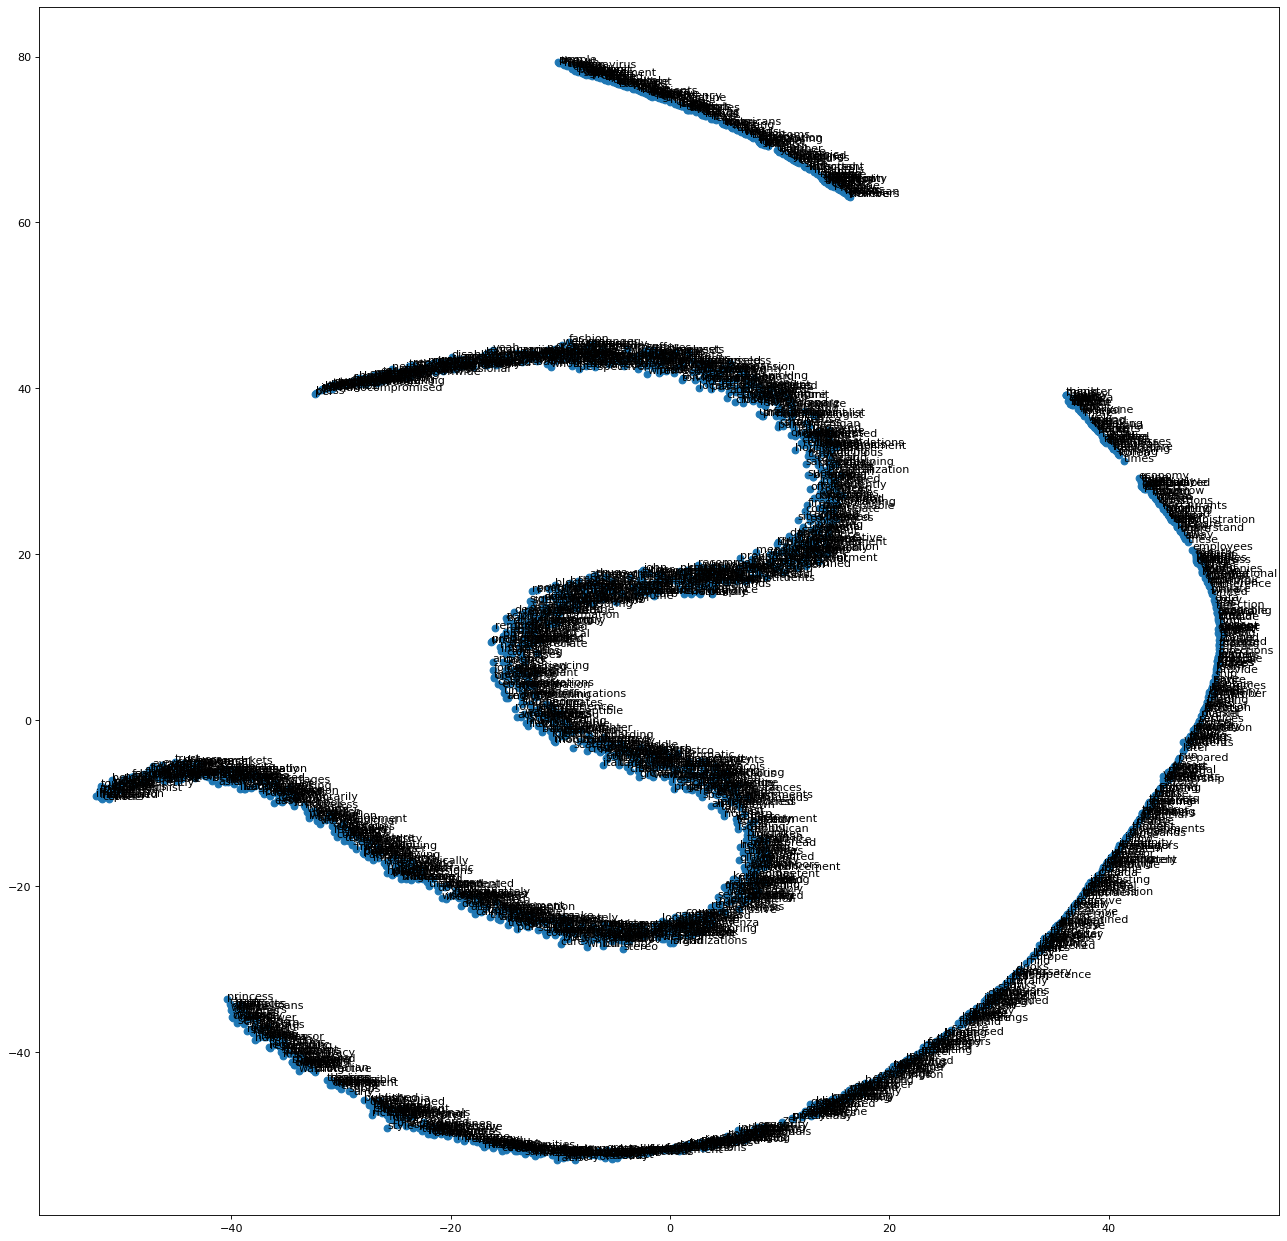

In [8]:
sentences0 = []
for c in community0:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences0.append(s[0])

model0 = gensim.models.Word2Vec(sentences0, size=300)

#print(list(model0.wv.vocab))
print(len(model0['food']))

# Plot graph words
vocab = list(model0.wv.vocab)
X = model0[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Community 1

300


<function matplotlib.pyplot.show>

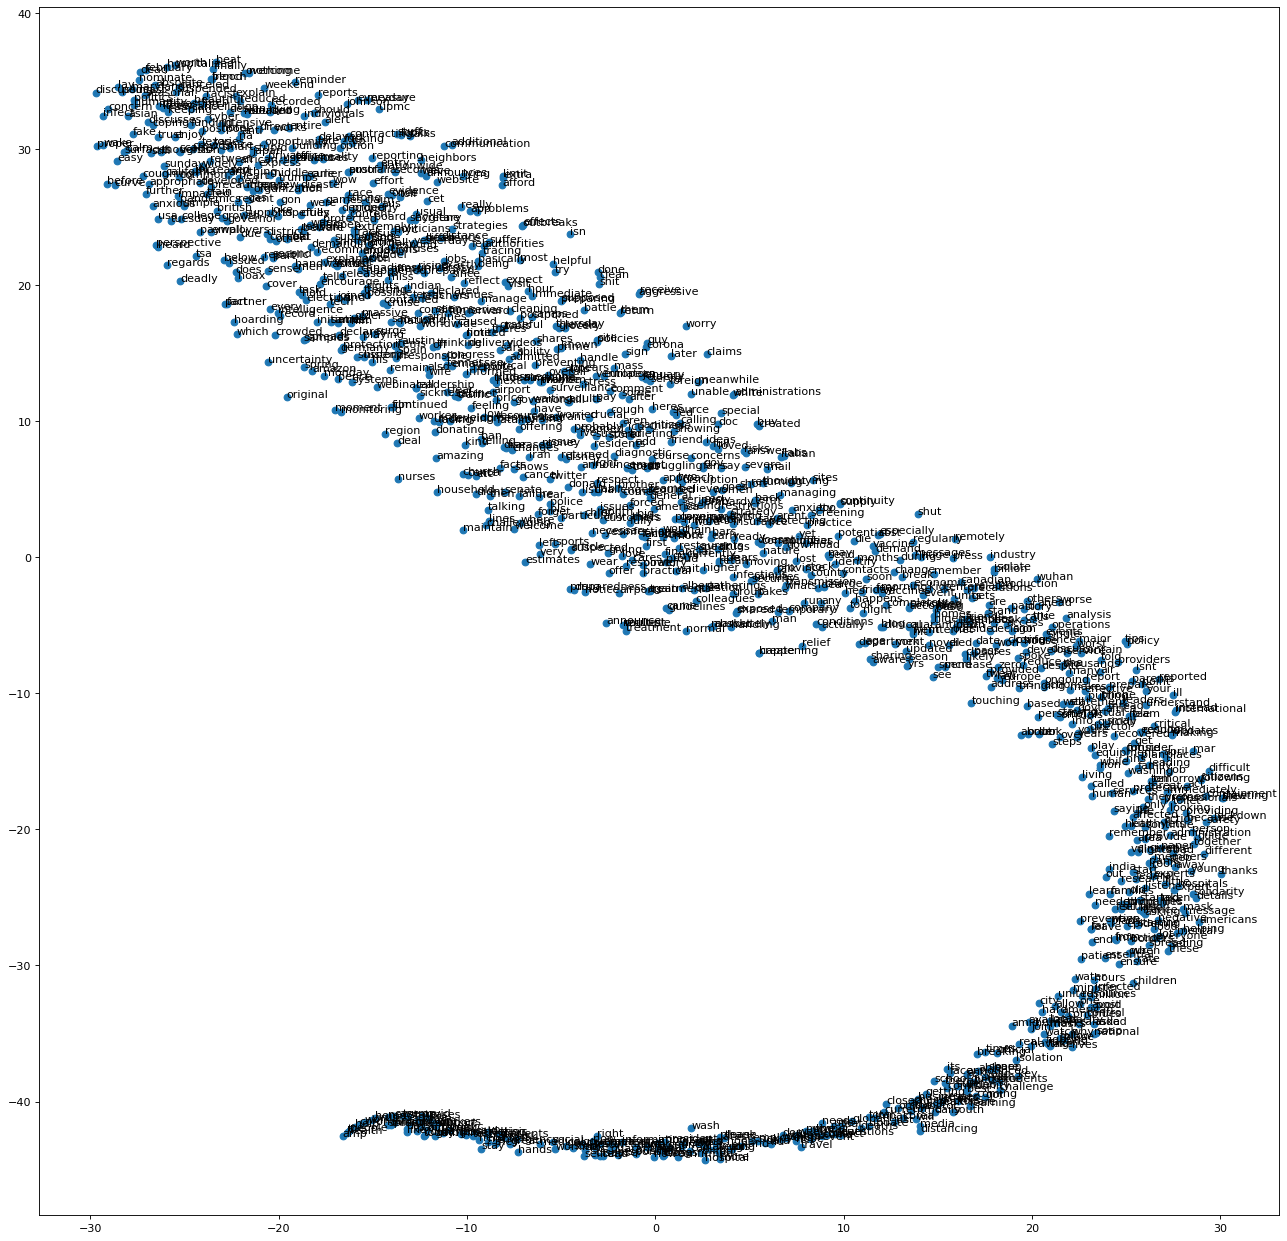

In [9]:
sentences1 = []
for c in community1:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences1.append(s[0])

model1 = gensim.models.Word2Vec(sentences1, size=300)

#print(list(model1.wv.vocab))
print(len(model1['food']))

# Plot graph words
vocab = list(model1.wv.vocab)
X = model1[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Community 2

300


<function matplotlib.pyplot.show>

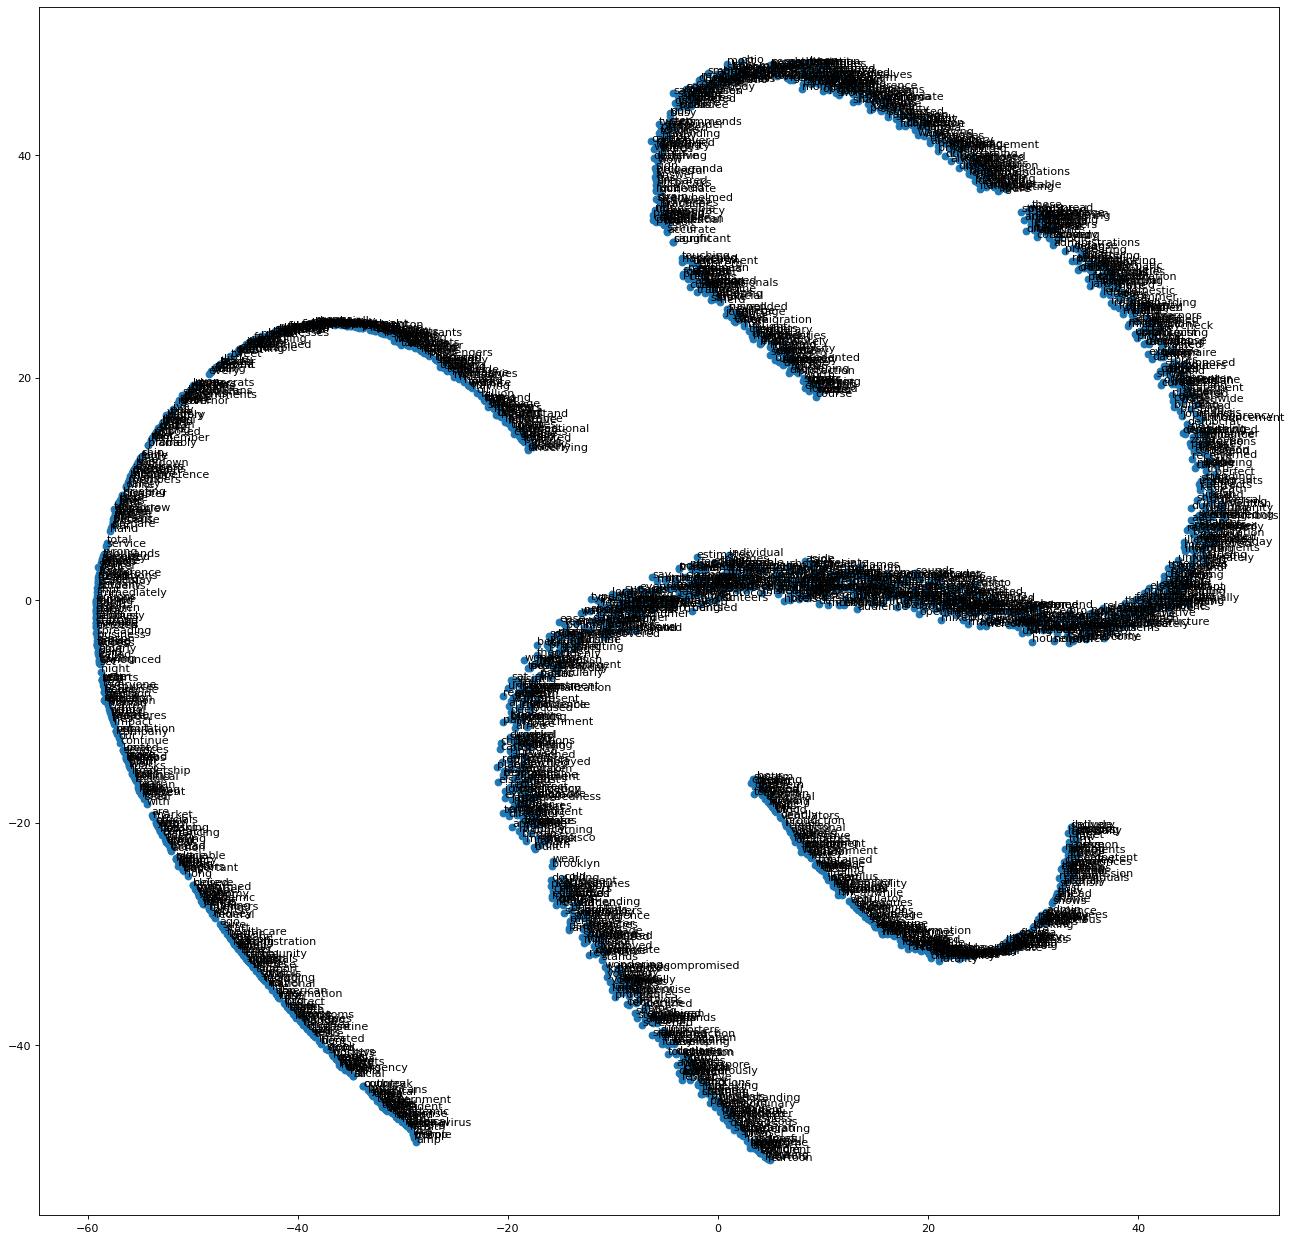

In [10]:
sentences2 = []
for c in community2:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences2.append(s[0])

model2 = gensim.models.Word2Vec(sentences2, size=300)

#print(list(model2.wv.vocab))
print(len(model2['food']))

# Plot graph words
vocab = list(model2.wv.vocab)
X = model2[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Global Dataset

In [11]:
global_dataset = '/content/drive/My Drive/covid_project/word2vec/global_dataset'

global_model = KeyedVectors.load_word2vec_format(global_dataset+'/Set1_TweetDataWithoutSpam_Word.bin', binary=True)

In [13]:
print(len(global_model['food']))

300


### Distance

#### Processing

In [14]:
words0 = list(model0.wv.vocab)
words1 = list(model1.wv.vocab)
words2 = list(model2.wv.vocab)

words_intersection = list(set(words0) & set(words1) & set(words2))

print(len(words_intersection))

1033


#### Compute Deviation

In [16]:
deviation = {}
global_model_words = list(global_model.wv.vocab)

for w in words_intersection:
  if w in global_model_words:
    dist0 = distance.cosine(global_model[w], model0[w])
    dist1 = distance.cosine(global_model[w], model1[w])
    dist2 = distance.cosine(global_model[w], model2[w])
    max_dev = max(dist0, dist1, dist2)
    if max_dev == dist0: d = 0
    if max_dev == dist1: d = 1
    if max_dev == dist2: d = 2
    deviation[w] = [max_dev, d]

print(len(deviation))
#print(deviation)

1029


#### Remove stop words

In [56]:
dev_com = defaultdict(list)
for elem in deviation:
  dev_com[deviation[elem][1]].append(elem)

#print(dev_com)
print(len(dev_com[0]))
print(len(dev_com[1]))
print(len(dev_com[2]))

# Remove stop_words
nltk.download('stopwords')
from nltk.corpus import stopwords

clean0 = [] # Community 0
for c in dev_com[0]:
  if c not in stopwords.words('english'):
    clean0.append(c)
dev_com[0] = clean0
print(len(dev_com[0]))

clean1 = [] # Community 1
for c in dev_com[1]:
  if c not in stopwords.words('english'):
    clean1.append(c)
dev_com[1] = clean1
print(len(dev_com[1]))

clean2 = [] # Community 2
for c in dev_com[2]:
  if c not in stopwords.words('english'):
    clean2.append(c)
dev_com[2] = clean2
print(len(dev_com[2]))

469
263
297
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
419
259
284


#### 10 most deviated terms

In [59]:
tmp_com0 = {}
tmp_com1 = {}
tmp_com2 = {}

print("Com 0")
for w in dev_com[0]:
  tmp_com0[w] = deviation[w][0]
sorted_dev = sorted(tmp_com0.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
  print(sorted_dev[i])

print("\nCom 1")
for w in dev_com[1]:
  tmp_com1[w] = deviation[w][0]
sorted_dev = sorted(tmp_com1.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
  print(sorted_dev[i])

print("\nCom 2")
for w in dev_com[2]:
  tmp_com2[w] = deviation[w][0]
sorted_dev = sorted(tmp_com2.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
  print(sorted_dev[i])


Com 0
('gets', 1.1654794812202454)
('ago', 1.1593952625989914)
('returning', 1.1593634188175201)
('still', 1.156489446759224)
('get', 1.130770206451416)
('hit', 1.1300484389066696)
('yet', 1.1280226111412048)
('wait', 1.126731976866722)
('exactly', 1.1251081675291061)
('years', 1.1250417083501816)

Com 1
('virus', 1.1786093413829803)
('see', 1.1780092418193817)
('infections', 1.1562337577342987)
('quarantine', 1.150237038731575)
('officially', 1.1401677876710892)
('home', 1.1339522898197174)
('viruses', 1.1310856938362122)
('room', 1.130123347043991)
('related', 1.1300795823335648)
('happening', 1.1260008364915848)

Com 2
('looks', 1.1865003556013107)
('new', 1.1702152490615845)
('look', 1.1507961452007294)
('light', 1.1464446783065796)
('updated', 1.1462744921445847)
('step', 1.1435784995555878)
('work', 1.1351577639579773)
('early', 1.1329478919506073)
('curve', 1.130529597401619)
('ceo', 1.1222968250513077)


### Results

#### Clusters from similarity

In [83]:
clusters0 = defaultdict(list)
similarity = {}
for w in dev_com[0]:
  for z in dev_com[0]:
    if z != w:
      similarity[z] = 1 - distance.cosine(model0[w], model0[z])
  sorted_sim = sorted(similarity.items(), key=lambda x: x[1], reverse=True)
  clusters0[w] = [sorted_sim[0], sorted_sim[1]]
  #print(f"{w} : {clusters0[w]}")
print(len(clusters0))

clusters1 = defaultdict(list)
similarity = {}
for w in dev_com[1]:
  for z in dev_com[1]:
    if z != w:
      similarity[z] = 1 - distance.cosine(model1[w], model1[z])
  sorted_sim = sorted(similarity.items(), key=lambda x: x[1], reverse=True)
  clusters1[w] = [sorted_sim[0], sorted_sim[1]]
  #print(f"{w} : {clusters1[w]}")
print(len(clusters1))

clusters2 = defaultdict(list)
similarity = {}
for w in dev_com[2]:
  for z in dev_com[2]:
    if z != w:
      similarity[z] = 1 - distance.cosine(model2[w], model2[z])
  sorted_sim = sorted(similarity.items(), key=lambda x: x[1], reverse=True)
  clusters2[w] = [sorted_sim[0], sorted_sim[1]]
  #print(f"{w} : {clusters2[w]}")
print(len(clusters2))

419
259
284


#### 3 largest clusters per community 

In [89]:
print("CLUSTER 0")
results0 = {}
for c in clusters0:
  res = (deviation[c][0] + deviation[clusters0[c][0][0]][0] + deviation[clusters0[c][1][0]][0]) / 3
  results0[c] = res

sorted_res = sorted(results0.items(), key=lambda x: x[1], reverse=True)

for i in range(20):
  print(f"{sorted_res[i][0]}, {clusters0[sorted_res[i][0]][0][0]}, {clusters0[sorted_res[i][0]][1][0]}")

print("\nCLUSTER 1")
results1 = {}
for c in clusters1:
  res = (deviation[c][0] + deviation[clusters1[c][0][0]][0] + deviation[clusters1[c][1][0]][0]) / 3
  results1[c] = res

sorted_res = sorted(results1.items(), key=lambda x: x[1], reverse=True)

for i in range(20):
  print(f"{sorted_res[i][0]}, {clusters1[sorted_res[i][0]][0][0]}, {clusters1[sorted_res[i][0]][1][0]}")

print("\nCLUSTER 2")
results2 = {}
for c in clusters2:
  res = (deviation[c][0] + deviation[clusters2[c][0][0]][0] + deviation[clusters2[c][1][0]][0]) / 3
  results2[c] = res

sorted_res = sorted(results2.items(), key=lambda x: x[1], reverse=True)

for i in range(20):
  print(f"{sorted_res[i][0]}, {clusters2[sorted_res[i][0]][0][0]}, {clusters2[sorted_res[i][0]][1][0]}")

CLUSTER 0
fever, weeks, today
california, today, weeks
amazing, people, tested
gets, help, today
wow, today, going
positive, people, today
returning, need, vulnerable
office, today, need
got, people, going
nyc, need, going
little, today, people
left, time, weeks
updates, sick, today
play, going, weeks
getting, people, going
drugs, weeks, tested
media, people, going
thread, people, today
heard, weeks, everyone
minutes, today, years

CLUSTER 1
officially, quarantine, virus
see, trump, virus
spreading, home, virus
epidemic, virus, home
severe, home, tests
viruses, support, virus
source, virus, china
home, health, virus
trumps, virus, days
site, home, tests
infections, health, home
add, virus, home
million, virus, home
giving, virus, quarantine
tests, health, virus
word, quarantine, pandemic
battle, trump, virus
infectious, pandemic, home
morning, health, virus
pandemic, health, virus

CLUSTER 2
updated, toilet, new
york, cases, new
idea, work, new
bringing, cases, new
personal, new, like


### Save Results

In [90]:
with open(word2vec+'/semantic_deviation/deviated_words_community0.txt', 'w') as f1:
  for elem in dev_com[0]:
    f1.write(elem+"\n")

with open(word2vec+'/semantic_deviation/deviated_words_community1.txt', 'w') as f2:
  for elem in dev_com[1]:
    f2.write(elem+"\n")

with open(word2vec+'/semantic_deviation/deviated_words_community2.txt', 'w') as f3:
  for elem in dev_com[2]:
    f3.write(elem+"\n")

In [91]:
import pickle
with open(word2vec+'/semantic_deviation/deviation_dictionary.pickle', "wb") as f:
    pickle.dump(deviation, f)